**Customer Segmentation Using K-Means Clustering**                                                                                                                          

**1. Import Libraries**

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score




*   pandas: For data manipulation and loading the dataset.
*   numpy: For numerical operations.
*   matplotlib: For plotting.
*   KMeans: The K-Means clustering algorithm from Scikit-Learn.
*   StandardScaler: For feature scaling.
*   silhouette_score: For evaluating clustering performance.







**2. Load the Dataset**

In [26]:
# Load the dataset
data = pd.read_csv('Mall_Customers.csv')


In [27]:
# Display the first few rows
data.head()

# Basic statistics
data.describe()

# Check for missing values
data.isnull().sum()


,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


**3. Select Relevant Features**

In [28]:
# Select the features for clustering
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]


**4. Preprocess the Data**

StandardScaler: Standardizes features to have zero mean and unit variance, which helps in better clustering performance.

In [29]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


**5. Determine Optimal Number of Clusters (Elbow Method)**



*   WCSS (Within-Cluster Sum of Squares): Measures the total distance between samples and their cluster centers.

*   Elbow Method: Plots WCSS against the number of clusters to find the optimal number of clusters where the decrease in WCSS starts to slow down.



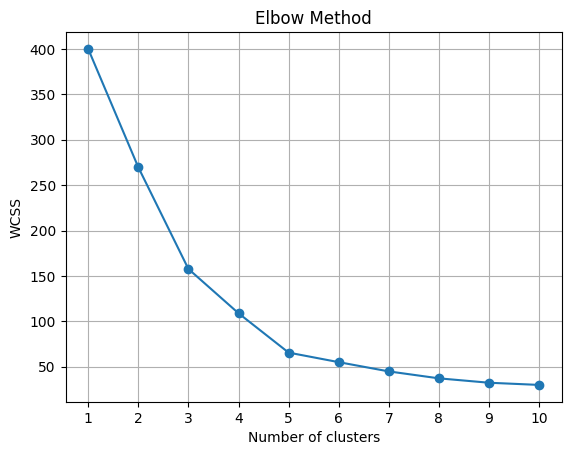

In [30]:
# Elbow method to determine the optimal number of clusters
wcss = []
k_values = range(1, 11)
for i in k_values:
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the results onto a line graph
plt.plot(k_values, wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(k_values)
plt.grid(True)
plt.show()


**7. Fit the K-Means Model with Optimal k**

Fits the K-Means model with the optimal number of clusters.

In [31]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)


**8. Add Cluster Labels to the Original Data**

Adds the cluster labels to the original DataFrame for further analysis.

In [32]:
# Add the cluster labels to the original dataset
data['Cluster'] = y_kmeans
data.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


**9. Display Cluster centers**

Cluster Centers: Transform the cluster centers back to the original scale to interpret them easily.

In [33]:
# Centroids of the clusters
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
print("Cluster Centers:\n", cluster_centers)



Cluster Centers:
 [[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [88.2        17.11428571]
 [26.30434783 20.91304348]]


**10. Evaluate Clustering Performance**

Silhouette Score: Measures how similar each sample is to its own cluster compared to other clusters. Values close to 1 indicate well-defined clusters.

In [36]:
silhouette_avg = silhouette_score(X_scaled, y_kmeans)
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.5546571631111091


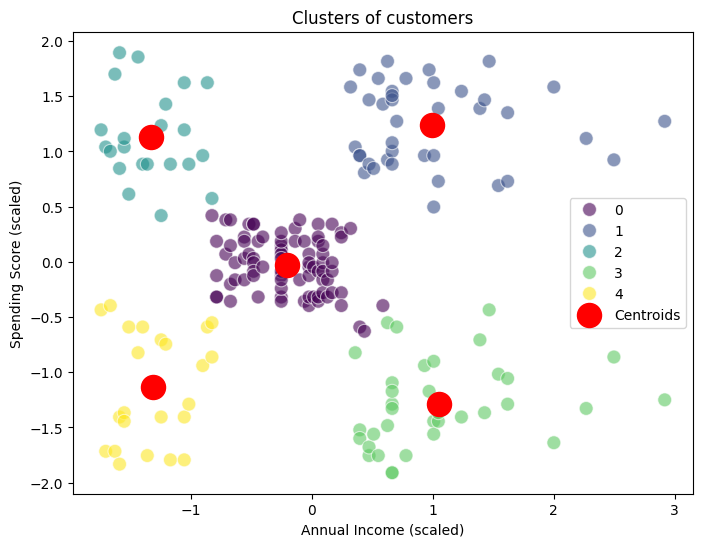

In [37]:
# Visualizing the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=y_kmeans, palette='viridis', s=100, alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend()
plt.show()
